In [10]:
"""
An implementation for HW2.
This is source code for logistic regression for optimal performance.
This uses Logistic regression method with cross entrophy with GD for optimization.
By 32190984 Isu Kim  @ github.com/gooday2die
"""

'\nAn implementation for HW2.\nThis is source code for logistic regression for optimal performance.\nThis uses Logistic regression method with cross entrophy with GD for optimization.\nBy 32190984 Isu Kim  @ github.com/gooday2die\n'

In [10]:
import pandas as pd
import numpy as np

In [11]:
def sigmoid(x):
    """
    A function that implements sigmoid function.
    This will calculate sigmoid function with value of x.
    
    @param x: The x value to calculate sigmoid function.
    @return: The calculated value in float.
    """
    return 1 / (1 + np.exp(-x))

In [12]:
def equation(x, theta):
    return theta[0] * x[0] + theta[1] * (x[1] ** 4) + theta[2] * ((x[1] ** 3) * x[2]) + theta[3] * ((x[1] ** 2) * (x[2] ** 2)) + theta[4] * (x[1] * (x[2] ** 3)) + theta[5] * x[2] ** 4

In [13]:
def hypothesis(x, theta):
    """
    A function that is for hypothesis which is our model h_\theta(x)
    This will calculate sigmoid function with linear function as exponent.
    
    Both parameters must be in 1D flattened list object.
    @param x: The list object containing pair of [x_1 and x_2]
    @param theta: The list object containing tuple of [\theta_0, \theta_1, \theta_2]
    @return: The calculated value.    
    """
    return sigmoid(equation(x, theta))

In [14]:
def get_gradient(x, y, theta, j):
    """
    A function that is for calculating gradient of specific j.

    @param x: All data containing x values. 
              This shall be in N * 3 dimension.
    @param y: All data containing y values.
              This shall be in N * 1 dimension.
    @param theta: All theta values.
              This shall be in N * 1 dimension.
    @param j: The specific j to get gradient from.
              For example, if we are about to update \theta_1, use j as 1.
              This function will calculate gradient of the cost graph with j = 1.
    @return: The calculate gradient value for specific j.
    """
    tmp = 0
    for i in range(len(x)):
        predict = hypothesis(x[i], theta)
        mul = 0
        if (j == 0):
            mul = 1
        elif (j == 1):
            mul = x[i][1] ** 4
        elif (j == 2):
            mul = (x[i][1] ** 3) * (x[i][2] ** 1)
        elif (j == 3):
            mul = (x[i][1] ** 2) * (x[i][2] ** 2)
        elif (j == 4):
            mul = (x[i][1] ** 1) * (x[i][2] ** 3)
        elif (j == 5):
            mul = x[i][2] ** 4
        tmp = tmp + (predict - y[i]) * mul
    return tmp / len(x)

In [15]:
def do_gradient_descent(max_iter, learning_rate, data_x, data_y, round_point):
    """
    A function that does gradient descent.
    This will use logistic regression with cost using cross entropy.
    
    Please refer to documentation for more information about implementation.
    
    @param max_iter: The maximum iteration count for training. Use iterations like 1000000.
    @param learning_rate: The learning rate for gradient descent.
                          Use learning rate which is not too small, don't use values like 0.01.
                          That will take so much time.
    @param data_x: The x data.
    @param data_y: The y data.
    @param round_point: The point that the weights are rounded.
                        If not rounded, this might go up to lots of iterations.
    @return list object that contains (a, b)
    """
    theta = [0] * 6  # Intial value for \thetas.
    x = [(1, data_x["x1"][i], data_x["x2"][i]) for i in range(len(data_x))]  # Store 1, x_1, x_2)
    y = list(data_y)
    
    before_theta = list()
    
    for i in range(max_iter):  # Iterate for max_iter count
        if i % 100 == 0:  # In every 1000 iterations, print \theta. just for outputs.
            print("[+] Iter : " + str(i) + " / Theta : " + str(theta))

        before_theta = theta
        tmp_theta = [0] * 6  # Store tmp \theta values.
    
        for j in range(6):  # Update \theta_0 to \theta_3
            gradient = get_gradient(x, y, theta, j)  # Calculate gradient
            tmp_theta[j] = theta[j] - learning_rate * gradient  # Apply GD.

        theta = tmp_theta  # Update \thetas simultaneously.        

        # Check if convergence happened. If so, stop training.
        if ([round(x, round_point) for x in before_theta] == [round(x, round_point) for x in theta]):
        #if before_theta == theta:
            print("Convergence!!! Stop training.")
            print("[+] Iter : " + str(i) + " / Theta : " + str(theta))
            break
        
    return theta

In [16]:
def predict(x, theta):
    """
    A function that predicts data using theta value
    @param x: The x value in [X_0, X_1, X_2] format.
    @param theta: The theta values to use.
    @return: Predicted label
    """
    if equation(x, theta) >= 0:
        return 1
    else:
        return 0

In [17]:
def calculate_accr(x_in, y_in, theta):
    """
    A function that calculates accuracy with \theta
    The accuracy is calculated by
    (total correct predictions) / (data count)
    
    @param x_in: The x value in [X_1, X_2] format
    @param y_in: The y values
    @param theta: The theta values in [theta_0, theta_1, theta_2] format
    @return Accuracy.
    """
    x = [(1, x_in["x1"][i], x_in["x2"][i]) for i in range(len(y_in))]  # Store (1, x_1, x_2)
    y = list(y_in)  # Store y values.

    correct = 0
    for i in range(len(x)):  # Iterate and check if predict matches real data.
        predicted = predict(x[i], theta)
        if predicted == y[i]:
            correct += 1  # If so, add one to correct.
    print("[+] " + str(correct) + "/" + str(len(x)))
    return correct / len(x)  # Divide all corrects by all data.

In [18]:
def calculate_cost(x_in, y_in, theta):
    """
    A function that calculates cost of with \theta.
    The cost is calculated by
    
    -1/m sum i from 1 to m (y_i * ln(h_\theta(x_i)) + (1 - y_i) * ln(1 - h_\theta(x_i)))
    
    @param x_in: The x value in [X_1, X_2] format
    @param y_in: The y values
    @param theta: The theta values in [theta_0, theta_1, theta_2] format
    @return Cost.
    """
    x = [(1, x_in["x1"][i], x_in["x2"][i]) for i in range(len(y_in))]  # Store (1, x_1, x_2)
    y = list(y_in)  # Store y values.
    
    total = 0
    for i in range(len(y)):
        # Iterate and calculate (y_i * ln(h_\theta(x_i)) + (1 - y_i) * ln(1 - h_\theta(x_i))
        total += ((y[i] * np.log(hypothesis(x[i], theta))) + (1 - y[i]) * np.log(1 - hypothesis(x[i], theta)))
    
    return -1 * total / len(y)

In [19]:
df_train = pd.read_csv("../hw2_train.csv")  # Read csv file.
data_x = df_train[["x1", "x2"]]  # Select x1 and x2 col from data
data_y = df_train["y"]  # Select y col from data

In [20]:
# This is for Task 1. from homework 2.
# This will train data using hw2_train.csv and store theta values into result.
# Please be aware that this will take lots of time to converge and exit.
# If you cannot wait this convergence, there are two options
#
# 1. Use low rounding points: 
#    This will make our model if some digits match for some digits, it will consider it convergence.
result = do_gradient_descent(1000000, 0.1, data_x, data_y, 5) 

[+] Iter : 0 / Theta : [0, 0, 0, 0, 0, 0]


/tmp/ipykernel_213712/727300407.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


[+] Iter : 100 / Theta : [1.004747337173619e+00, -0.767435254185356, -0.4668850363967771, 0.23471810913510374, -0.3122691572770875, -0.009325925137118149]
[+] Iter : 200 / Theta : [1.2907477545692112e+00, 0.015178362313361143, -0.23721367122454878, 0.3056454872139188, -0.29512092983760685, 0.008893498772662916]
[+] Iter : 300 / Theta : [1.3913262952040302e+00, -0.1038498104638454, -0.28637796504015917, 0.3229235829485343, -0.30125994551431745, 0.010558096091723151]
[+] Iter : 400 / Theta : [1.417317685064816e+00, -0.039663962517450274, -0.23002594216530634, 0.31072589863126027, -0.2926174374461987, -0.0013401760558737104]
[+] Iter : 500 / Theta : [1.444228332092201e+00, -0.082574728249526, -0.28153292026099, 0.2744756172389351, -0.2973104584013322, 0.016916319758987462]
[+] Iter : 600 / Theta : [1.4354000363288262e+00, -0.23733460640934517, -0.26821399776529015, 0.28770560969094533, -0.30403511864243465, 0.0007092686928468032]
[+] Iter : 700 / Theta : [1.4129778104080783e+00, -0.714749

[+] Iter : 5300 / Theta : [1.4402854992134115e+00, -0.06361048680617537, -0.2320842937272954, 0.2984477887277856, -0.29504379385711843, 0.0011259627762920579]
[+] Iter : 5400 / Theta : [1.4121044609005269e+00, 0.00347843107184799, -0.15615170768041364, 0.252629349093009, -0.29549006263467026, -0.01605992409475995]
[+] Iter : 5500 / Theta : [1.431266890033413e+00, -0.18733708118517817, -0.23039869960653034, 0.2703444074806031, -0.29673916968843234, -0.0047221076996163056]
[+] Iter : 5600 / Theta : [1.4265354049571353e+00, -0.2510134449254871, -0.22774821584085272, 0.26926476944985295, -0.30953570461550733, -0.012956779238528632]
[+] Iter : 5700 / Theta : [1.4257012012509247e+00, -0.2705203320997751, -0.22392735534492353, 0.23040204739786524, -0.3033335387432752, -0.0012282832539082314]
[+] Iter : 5800 / Theta : [1.4262027197063147e+00, 0.022732193174183984, -0.18209398887325953, 0.25574132854898085, -0.28885139421374356, -0.007011416126713776]
[+] Iter : 5900 / Theta : [1.42834487674479

[+] Iter : 10500 / Theta : [1.446531726091224e+00, -0.16634206301152854, -0.29354765834401314, 0.2796424552202624, -0.3017287377946935, 0.018102064454963936]
[+] Iter : 10600 / Theta : [1.4344781370992508e+00, -0.1470713280699053, -0.21331121990976049, 0.278495034616427, -0.30270013937757034, -0.007961637055766788]
[+] Iter : 10700 / Theta : [1.4143350643741797e+00, -0.3281201894338124, -0.20980074828504675, 0.2507342682017212, -0.3177902656229349, -0.020962350857705148]
[+] Iter : 10800 / Theta : [1.41865991702439e+00, -0.24155204069923553, -0.22240906115170833, 0.26468525757519146, -0.3064973587693157, -0.014963550854407447]
[+] Iter : 10900 / Theta : [1.4413050264388971e+00, -0.16662142490508047, -0.290226515414197, 0.28529795719311046, -0.30676661808552763, 0.017233416194671742]
[+] Iter : 11000 / Theta : [1.4331629264783021e+00, -0.3196192445234649, -0.2835190054700369, 0.28752621039151416, -0.317095462024258, -0.0019515527170690973]
[+] Iter : 11100 / Theta : [1.438694065730375e+

[+] Iter : 15700 / Theta : [1.4300732025097767e+00, -0.017525884119870522, -0.18113715134707148, 0.26945502460892906, -0.2955146865240096, -0.012252911657837325]
[+] Iter : 15800 / Theta : [1.442965405239916e+00, 0.027676083857296002, -0.21615040100819977, 0.26625127802644605, -0.2931872753163722, 0.002915283649949418]
[+] Iter : 15900 / Theta : [1.4401606028970115e+00, -0.43768688767011094, -0.31413157416792487, 0.265420201460326, -0.3175559457151558, -0.0032157791444413844]
[+] Iter : 16000 / Theta : [1.4420963177794506e+00, -0.013190017434029547, -0.22848437365735427, 0.28879629255470024, -0.29612987185475514, 0.0015764433371202608]
[+] Iter : 16100 / Theta : [1.4256621397427274e+00, -0.10808625578448439, -0.19678393717936313, 0.2814867713299461, -0.3030015055128004, -0.012178241845483433]
[+] Iter : 16200 / Theta : [1.412096843631998e+00, -0.09377482101199652, -0.15975946801362026, 0.2556762382831823, -0.3072107474045338, -0.021096798461280594]
[+] Iter : 16300 / Theta : [1.4397867

[+] Iter : 20900 / Theta : [1.4447650049445764e+00, -0.04629441756070646, -0.23550650585703128, 0.283933769697583, -0.2924219244741328, 0.006640575621043671]
[+] Iter : 21000 / Theta : [1.4361436093291655e+00, -0.2747058355797411, -0.23246485996578514, 0.2402281405768768, -0.3045660772693272, -0.002250164685319713]
[+] Iter : 21100 / Theta : [1.4578935735876535e+00, 0.0023021728777148087, -0.2736044672322122, 0.2950719143047283, -0.29753986459081855, 0.014752804412011425]
[+] Iter : 21200 / Theta : [1.451948521070645e+00, -0.25108779607714543, -0.3051681351669948, 0.25933840310502393, -0.31060571445743884, 0.01106493864533262]
[+] Iter : 21300 / Theta : [1.437873384901468e+00, 0.011983164706492189, -0.17644874410910585, 0.28342802937362055, -0.2953661021451297, -0.017123118711822555]
[+] Iter : 21400 / Theta : [1.4393326241306326e+00, -0.07212535901714755, -0.3146711113366967, 0.2509542686839738, -0.3187409025215105, 0.024519144529464507]
[+] Iter : 21500 / Theta : [1.4405734356977065e

[+] Iter : 26100 / Theta : [1.4183355075280208e+00, -0.4696681994267259, -0.312468023916667, 0.24912022303446513, -0.3249534139458461, 0.0038954926068396033]
[+] Iter : 26200 / Theta : [1.4349845390876004e+00, -0.06706652228485965, -0.23568338824111634, 0.31094499599657865, -0.2991773648834866, 4.661836460624971e-05]
[+] Iter : 26300 / Theta : [1.4365079263768696e+00, -0.09212109713137867, -0.27200349531525675, 0.29390783904113443, -0.30279892373192824, 0.0167150452872475]
[+] Iter : 26400 / Theta : [1.4172373636056546e+00, -0.08675770263366928, -0.2366178620320314, 0.2707616506217274, -0.307130319416783, 0.014992379092714638]
[+] Iter : 26500 / Theta : [1.4176874250811764e+00, -0.14009288076917908, -0.1962046438278429, 0.2693136439327002, -0.3068130947631706, -0.012527804656432539]
[+] Iter : 26600 / Theta : [1.4277004825067556e+00, 0.02955626166559236, -0.18611079964002689, 0.27894888984354455, -0.3000390989309657, -0.006510960052815802]
[+] Iter : 26700 / Theta : [1.434533693939916e

[+] Iter : 31300 / Theta : [1.425211835794943e+00, -0.5351389779591689, -0.3270345103376533, 0.2284149459126864, -0.32383721784367636, 0.004130637875749639]
[+] Iter : 31400 / Theta : [1.4333446409387642e+00, -0.06036300050625858, -0.19263677779856092, 0.2855530941490018, -0.2998026013759261, -0.012538121756436626]
[+] Iter : 31500 / Theta : [1.435724998404468e+00, -0.2598172782518963, -0.31814727379303986, 0.27765739953468604, -0.3159584694330097, 0.01844525536371532]
[+] Iter : 31600 / Theta : [1.4191783356195207e+00, -0.38806514208874127, -0.23063285220761304, 0.24230010878542552, -0.3152475500669973, -0.01618045194045774]
[+] Iter : 31700 / Theta : [1.3963430564732109e+00, -0.9871126517593124, -0.37316882884247077, 0.16066125587984048, -0.35055845114458195, -0.04004154207752161]
[+] Iter : 31800 / Theta : [1.4244666906555332e+00, -0.38671230336287166, -0.27511462390627944, 0.26795086978679833, -0.3189529887605207, -0.006113694078853062]
[+] Iter : 31900 / Theta : [1.412891141045482

[+] Iter : 36500 / Theta : [1.4280079932823868e+00, -0.03038259354286782, -0.23881001714851297, 0.28678755079718427, -0.29840791598839955, 0.008958691343594198]
[+] Iter : 36600 / Theta : [1.4091827824656764e+00, -0.09561965436645167, -0.17989539885613412, 0.2678851084337626, -0.3097307817087113, -0.011092769782521847]
[+] Iter : 36700 / Theta : [1.4130801880057917e+00, -0.4511702119760612, -0.27872380064273217, 0.25772334113789463, -0.32221253294909, -0.008888222580083175]
[+] Iter : 36800 / Theta : [1.4245034118691065e+00, 0.020590923897075647, -0.2520312546262651, 0.285973541341005, -0.29767968733502326, 0.01427026005257227]
[+] Iter : 36900 / Theta : [1.4111730822780002e+00, -0.7695776837651285, -0.39113314627333223, 0.19692497408304294, -0.3479873431189087, -0.014501410100867286]
[+] Iter : 37000 / Theta : [1.441220859052114e+00, -0.03381601501634706, -0.2290491845155498, 0.2833219951728111, -0.29910603638140554, -0.0001461007641468115]
[+] Iter : 37100 / Theta : [1.44429964326130

[+] Iter : 41700 / Theta : [1.420026492185204e+00, -0.6172407014328294, -0.30490667664438253, 0.23757153667929426, -0.3228987654305833, -0.022506457611174722]
[+] Iter : 41800 / Theta : [1.4235415600792793e+00, -0.17143373688018454, -0.18285508200047013, 0.24122015782831574, -0.2963182532860219, -0.02026649007144024]
[+] Iter : 41900 / Theta : [1.4463935177104061e+00, -0.06815357521395293, -0.2637237284340502, 0.3056694020691349, -0.295754455527307, 0.00817487304704289]
[+] Iter : 42000 / Theta : [1.4349239679027912e+00, -0.39331923273057473, -0.26101852999942504, 0.2681173752297965, -0.3072461205804275, -0.019882157401151616]
[+] Iter : 42100 / Theta : [1.4240154836389067e+00, 0.015375418032619298, -0.1899984724626777, 0.26679979077179833, -0.3017952128907618, 0.0063126791811962115]
[+] Iter : 42200 / Theta : [1.4363734800822119e+00, -0.37364946807512917, -0.3431850858281726, 0.2459081312590777, -0.32154681946343744, 0.01911514385509657]
[+] Iter : 42300 / Theta : [1.416837795349415e+

[+] Iter : 46900 / Theta : [1.4474913579118895e+00, -0.14163651427089963, -0.28886637594847525, 0.3021954051558934, -0.3007461890418599, 0.009445229702486225]
[+] Iter : 47000 / Theta : [1.4213682385764612e+00, -0.44895665315892064, -0.29358647875728944, 0.2535972683848028, -0.32855169653030875, -0.00539739239681087]
[+] Iter : 47100 / Theta : [1.4387438496750604e+00, -0.11414302022357227, -0.2550065163791467, 0.2764588689146837, -0.3064406523666559, 0.005696329659507966]
[+] Iter : 47200 / Theta : [1.4259951451848358e+00, -0.04854045959928476, -0.17538304957752426, 0.2680909806212327, -0.3039819191781865, -0.012478261697279053]
[+] Iter : 47300 / Theta : [1.4315963220535874e+00, -0.33579346765313356, -0.2853016050338313, 0.2726529776779756, -0.30781679499608494, -0.0017886520671752948]
[+] Iter : 47400 / Theta : [1.4093764548701726e+00, -0.4902217382392161, -0.23647766185813662, 0.21923046512821476, -0.3190961607758719, -0.021859737267992466]
[+] Iter : 47500 / Theta : [1.434987920045

[+] Iter : 52100 / Theta : [1.432989924540415e+00, -0.233283144365469, -0.2568452725622899, 0.2668645513976085, -0.30421837116788175, 0.0057922399110342596]
[+] Iter : 52200 / Theta : [1.4479336550301733e+00, -0.10544876407250064, -0.3210475050354057, 0.27614988066849455, -0.3042241646998847, 0.025140737010432006]
[+] Iter : 52300 / Theta : [1.4404348580995865e+00, -0.27544756809793447, -0.31806244729720534, 0.2671397748947292, -0.3136294191136242, 0.018441140022488613]
[+] Iter : 52400 / Theta : [1.413972031512819e+00, -0.5227325229703107, -0.23922854131893492, 0.22811145716241127, -0.3232709374032884, -0.035381017402198595]
[+] Iter : 52500 / Theta : [1.4143034355518045e+00, -0.7070223759419167, -0.2973365566948702, 0.2168315437592203, -0.33427652593206103, -0.037311664583678655]
[+] Iter : 52600 / Theta : [1.4391445646366439e+00, -0.14090533076897677, -0.22323577870474037, 0.28353122364385486, -0.29885041227643033, -0.0056786841722245365]
[+] Iter : 52700 / Theta : [1.42712308909500

[+] Iter : 57300 / Theta : [1.4304853784588327e+00, -0.18764112355917553, -0.22299270712582528, 0.2755567965909597, -0.3040924655391327, -0.013899136861282895]
[+] Iter : 57400 / Theta : [1.4255397361151314e+00, -0.15536332729565047, -0.22119119501372234, 0.2866428902826663, -0.3069168692621667, -0.011056973233299731]
[+] Iter : 57500 / Theta : [1.4285406252703956e+00, -0.026615786808571434, -0.19098738356692785, 0.28248034676966693, -0.2967874085114995, -0.012182582664481145]
[+] Iter : 57600 / Theta : [1.4155183745747508e+00, -0.1681438495431971, -0.19973856713142688, 0.2519252599416357, -0.3117604968919479, 0.00038344477520033116]
[+] Iter : 57700 / Theta : [1.4231166957081642e+00, -0.46720017318112966, -0.2631845912475561, 0.24781578353866382, -0.31580352196272593, -0.018825529825168608]
[+] Iter : 57800 / Theta : [1.4409197499574162e+00, 0.01417968071487996, -0.2640782710634526, 0.2897890811552654, -0.29964386113602254, 0.015996103403555596]
[+] Iter : 57900 / Theta : [1.434214751

[+] Iter : 62500 / Theta : [1.4257280823449134e+00, 0.025187306370504037, -0.1686046203189306, 0.27562101766345776, -0.29532893129701693, -0.016276578105150263]
[+] Iter : 62600 / Theta : [1.4522384539745674e+00, -0.09119658723206409, -0.3214193967484057, 0.29533895397509247, -0.30705844244857844, 0.021751412961687415]
[+] Iter : 62700 / Theta : [1.4168476254173563e+00, -0.5805983902720864, -0.2969531213762711, 0.24250991768133937, -0.3188852805048153, -0.02263273964212376]
[+] Iter : 62800 / Theta : [1.4317024033426613e+00, -0.15310731149567297, -0.2608448363354141, 0.26507618027125723, -0.30788633268922355, 0.016175005993911293]
[+] Iter : 62900 / Theta : [1.415594995077054e+00, -0.027360859656865077, -0.18571696753451206, 0.26869274889490613, -0.2953765668645825, -0.004660116944278347]
[+] Iter : 63000 / Theta : [1.418983486692941e+00, -0.33910436836932356, -0.2537709128937123, 0.25504345389670746, -0.31177117266881255, -0.005097492583546446]
[+] Iter : 63100 / Theta : [1.4400952693

[+] Iter : 67700 / Theta : [1.4348525508832104e+00, -0.21697156854134508, -0.29647992241753646, 0.2897342469475611, -0.31898135254518245, 0.011290282005010352]
[+] Iter : 67800 / Theta : [1.4301507968275857e+00, -0.012033286290514589, -0.19938847819954758, 0.28124020794657156, -0.2924286639322083, -0.006650597320036191]
[+] Iter : 67900 / Theta : [1.408876906462016e+00, -0.07281717763361861, -0.18950492692174287, 0.25021246237840433, -0.30765403938529023, -0.0005642649101322353]
[+] Iter : 68000 / Theta : [1.4105544778323975e+00, -0.14643990404173754, -0.1780465643385407, 0.25504932545354736, -0.30839819008561314, -0.018174221433224245]
[+] Iter : 68100 / Theta : [1.3788333881700716e+00, -0.8175996237203031, -0.286324055468522, 0.13714077514902157, -0.33285692387008364, -0.022173487132285608]
[+] Iter : 68200 / Theta : [1.4131665382228047e+00, -0.7229341942201697, -0.3056212187676775, 0.2109296273335824, -0.3212818346031717, -0.04102797554631612]
[+] Iter : 68300 / Theta : [1.432935245

[+] Iter : 72900 / Theta : [1.4358179787896668e+00, -0.29858748719389094, -0.2738439182331814, 0.26355909190244825, -0.3008062389585282, 0.0015908687044282263]
[+] Iter : 73000 / Theta : [1.4341379725258083e+00, -0.32155799368213006, -0.2867589157143047, 0.25060128341035914, -0.30233114232007924, 0.010254847610553494]
[+] Iter : 73100 / Theta : [1.4254736856259373e+00, -0.23738147105280138, -0.23428317770636356, 0.2692367029164522, -0.30757891202236853, -0.006711828745849122]
[+] Iter : 73200 / Theta : [1.4233563652280161e+00, -0.23724206262355543, -0.22976348350882747, 0.2742453164310612, -0.30954887506583023, -0.011921227409316507]
[+] Iter : 73300 / Theta : [1.4341158386531903e+00, -0.13537350749394578, -0.2690236652645731, 0.26401562490340713, -0.3068461044809516, 0.02321000371044854]
[+] Iter : 73400 / Theta : [1.4511241454236805e+00, 0.0057092169345970695, -0.29001251357533153, 0.28890601742610655, -0.2998907651883655, 0.015028707115680748]
[+] Iter : 73500 / Theta : [1.445952154

[+] Iter : 78100 / Theta : [1.4036850863418455e+00, -0.7052004349992061, -0.2720266563592782, 0.1964204567141603, -0.33558343995573736, -0.04169221622640598]
[+] Iter : 78200 / Theta : [1.4171793591938409e+00, -0.4983304121632097, -0.28596339398951054, 0.24600806271478462, -0.3203651303412086, -0.01049861380994076]
[+] Iter : 78300 / Theta : [1.4394890392022635e+00, -0.25171599097855957, -0.3083162001572314, 0.27761512361881974, -0.31167123087715476, 0.011264095668523853]
[+] Iter : 78400 / Theta : [1.4084449482415236e+00, 0.02061560989467609, -0.17533445810265985, 0.25383876264467664, -0.3056264550212061, 0.008100799952780945]
[+] Iter : 78500 / Theta : [1.4204268574344652e+00, -0.6617860329873195, -0.35725630658643737, 0.2115391322304816, -0.33603547068971684, -0.00548737603587135]
[+] Iter : 78600 / Theta : [1.4351579525508043e+00, -0.481990592812418, -0.38174806827391805, 0.23058701470858123, -0.33744567208960363, 0.017022590523585235]
[+] Iter : 78700 / Theta : [1.4363479810469852

[+] Iter : 83300 / Theta : [1.4370316367851645e+00, -0.030135685962858372, -0.21575372490052042, 0.30875246826687147, -0.2977988785494747, -0.005480693244520465]
[+] Iter : 83400 / Theta : [1.42304174725261e+00, -0.5871655474634114, -0.4237660926683378, 0.20399509075606992, -0.35297078189262526, 0.019075704780299636]
[+] Iter : 83500 / Theta : [1.4383198169103333e+00, -0.2411304501751299, -0.29994866950203214, 0.2534078933463095, -0.31521290890678433, 0.014202912667388136]
[+] Iter : 83600 / Theta : [1.4296811124628255e+00, 0.028221794026541597, -0.18612727782396482, 0.28733622906768835, -0.29365858729446154, -0.010738686304731501]
[+] Iter : 83700 / Theta : [1.4209500668357342e+00, -0.07603099115060025, -0.16689293777736636, 0.26688912544897886, -0.3029030067250882, -0.021470092819552523]
[+] Iter : 83800 / Theta : [1.4232920588376008e+00, -0.5802002093696781, -0.27979237929545636, 0.2344278682707248, -0.31858479403966783, -0.029547867295982574]
[+] Iter : 83900 / Theta : [1.447054537

[+] Iter : 88500 / Theta : [1.418603335872851e+00, -0.29993523680911105, -0.21746503939980696, 0.25700871985211965, -0.30555522800170215, -0.021221599241235112]
[+] Iter : 88600 / Theta : [1.4308178691829319e+00, -0.033450356100165515, -0.2243601190418849, 0.31060910504977207, -0.30118645878471545, -0.004729015602101797]
[+] Iter : 88700 / Theta : [1.4379803561177782e+00, 0.0266140751793853, -0.19535433519660445, 0.28662169007340205, -0.29130699816268085, -0.006494996242625377]
[+] Iter : 88800 / Theta : [1.4211233557890106e+00, -0.024555720533899372, -0.24750976035367872, 0.22360832626782826, -0.3128891334174104, 0.020648210945752667]
[+] Iter : 88900 / Theta : [1.4205522520477207e+00, -0.25449360405210747, -0.2588872134423025, 0.2613552267677581, -0.30629390290802505, 0.007816540798763691]
[+] Iter : 89000 / Theta : [1.430665882752901e+00, -0.1830955543169629, -0.25935535563655204, 0.28662190185540587, -0.30234102206861174, 0.005260224855594506]
[+] Iter : 89100 / Theta : [1.41602881

KeyboardInterrupt: 

In [21]:
result = [1.4362249202776316e+00, -0.11420703312960229, -0.21657500346596437, 0.2767189454647682, -0.2989477106750623, -0.0008083725381591508]

In [22]:
print("[+] Train data")
cost = calculate_cost(data_x, data_y, result)  # Calculate cost of trained model by train data.
print("[+] Cost : " + str(cost))
accr = calculate_accr(data_x, data_y, result)  # Accuracy of trained model by train data.
print("[+] Accuracy : " + str(accr))

[+] Train data
[+] Cost : 6.031411442869912e-01
[+] 1153/1500
[+] Accuracy : 0.7686666666666667


In [23]:
# This is for Task 2. from homework 2.
# This will load hw2_test.csv and validate cost and accuracy.
df_test = pd.read_csv("../hw2_test.csv")  # Read csv file.
data_x = df_test[["x1", "x2"]]  # Select x1 and x2 col from data
data_y = df_test["y"]  # Select y col from data

In [24]:
print("[+] Test data")
cost = calculate_cost(data_x, data_y, result)  # Calculate cost of trained model by test data.
print("[+] Cost : " + str(cost))
accr = calculate_accr(data_x, data_y, result)  # Accuracy of trained model by test data.
print("[+] Accuracy : " + str(accr))

[+] Test data
[+] Cost : 7.502769541004239e-01
[+] 384/500
[+] Accuracy : 0.768


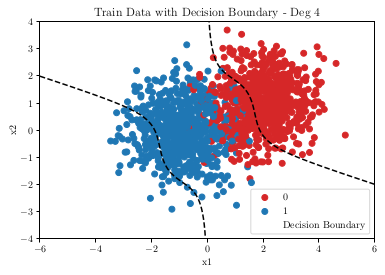

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
fig, ax = plt.subplots()

matplotlib.use("pgf")  # For storing graph into pgf for latex.
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

df_train = pd.read_csv("../hw2_train.csv")
colors = ['tab:red' if tmp == 0 else 'tab:blue' for tmp in df_train.y]  # Set colors according to it's lables.

plt.title("Train Data with Decision Boundary - Deg 4")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(df_train.x1[0], df_train.x2[0], c="tab:red", label="0")  # Those two scatters are for legends.
plt.scatter(df_train.x1[1], df_train.x2[1], c="tab:blue", label="1")
plt.scatter(df_train.x1[1:], df_train.x2[1:], c=colors[1:])

y, x = np.ogrid[-4:4:1000j, -6:6:1000j]
cs = plt.contour(
    x.ravel(), y.ravel(), result[1] * (x ** 4) + result[2] * (x ** 3) * y + result[3] * (x ** 2) * (y ** 2) + result[4] * x * (y ** 3) + result[5] * (y ** 4), [-result[0]], colors="black")

cs.collections[0].set_label("Decision Boundary")

plt.legend()
plt.show()
plt.savefig('deg4-train.pgf')

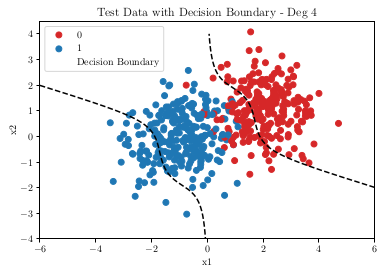

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
fig, ax = plt.subplots()

matplotlib.use("pgf")  # For storing graph into pgf for latex.
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

df_train = pd.read_csv("../hw2_test.csv")
colors = ['tab:red' if tmp == 0 else 'tab:blue' for tmp in df_train.y]  # Set colors according to it's lables.

plt.title("Test Data with Decision Boundary - Deg 4")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(df_train.x1[0], df_train.x2[0], c="tab:red", label="0")  # Those two scatters are for legends.
plt.scatter(df_train.x1[1], df_train.x2[1], c="tab:blue", label="1")
plt.scatter(df_train.x1[1:], df_train.x2[1:], c=colors[1:])

y, x = np.ogrid[-4:4:1000j, -6:6:1000j]
cs = plt.contour(
    x.ravel(), y.ravel(), result[1] * (x ** 4) + result[2] * (x ** 3) * y + result[3] * (x ** 2) * (y ** 2) + result[4] * x * (y ** 3) + result[5] * (y ** 4), [-result[0]], colors="black")

cs.collections[0].set_label("Decision Boundary")

plt.legend()
plt.show()
plt.savefig('deg4-test.pgf')